In [1]:
import importlib; 
try:
    import engmod.structfem as sfem; importlib.reload(sfem)
except:
    try:
        import add_engmod
        import engmod.structfem as sfem; importlib.reload(sfem)    
        print("EngMod Development Mode Activated. Not applicable/relevant to students.")        
    except Exception as e:
        print(e)
        print("Engmod is not located in the correct folder. ")

import numpy as np 
import matplotlib.pyplot as plt 

# Bearings at Front and Rear wheels

### Load case 1: 33.3% of weight on handle bars & 33.3% of weight on seat & 33.3% of weight on pedals

In [30]:
# The Young's modulus in Pa
E = 70E9
# The height of the beam in metres
h = 27/1E3
# The width of the beam in metres
b = 27/1E3
# The area moment of inertia:
I = 1/12 * b * h**3
# The cross-sectional area
A = h * b
# The density (only important for dynamic analyses)
rho = 2710
# The force applied to the structure. 
F = (120*9.8)/3
print(F)

392.0


In [31]:
nodecoor = np.array([
                        [0,0],              # Node 0
                        [141.13,461.62],    # Node 1
                        [158.67,519],       # Node 2
                        [179.14,585.94],    # Node 3
                        [78.32,647.23],     # Node 4
                        [574.79,0],         # Node 5
                        [635.22,430],       # Node 6
                        [663.05,628.05],    # Node 7
                        [884.36,0],         # Node 8


])     


elemconn = np.array([
                     [0,1],  # Element 0 connects Node 0 and Node 1
                     [1,2],  # Element 1 connects Node 1 and Node 2
                     [2,3],  # Element 2 connects Node 2 and Node 3
                     [3,4],  # Element 3 connects Node 3 and Node 4
                     [1,5],  # Element 4 connects Node 1 and Node 5
                     [2,6],  # Element 5 connects Node 2 and Node 6
                     [5,6],  # Element 6 connects Node 5 and Node 6
                     [6,7],  # Element 7 connects Node 6 and Node 7
                     [6,8],  # Element 8 connects Node 6 and Node 8
                     [5,8],  # Element 9 connects Node 5 and Node 8

])





prescribed_displacement = np.array([
                                    [0,0,0], # Node 1, in the 0 direction (x-direcion) with a displacement of 0
                                    [0,1,0], # Node 1, in the 1 direction (y-direcion) with a displacement of 0
                                    [8,0,0], # Node 8, in the 0 direction (x-direcion) with a displacement of 0
                                    [8,1,0], # Node 8, in the 1 direction (y-direcion) with a displacement of 0
                                    ])



prescribed_forces = np.array([
                              [7,1,-F], # (Seat)Prescribed force applied to Node 7, in the 1 direction (y-direcion) with a magnitude of F.
                              [4,1,-F], # (handle bars)Prescribed force applied to Node 4, in the 1 direction (y-direcion) with a magnitude of F.
                              [5,1,-F], # (Pedals)Prescribed force applied to Node 5, in the 1 direction (y-direcion) with a magnitude of F.
                                ])

# Element properties
elemprop = {}
# Young's modulus [Pa]
elemprop["E"] = np.ones(elemconn.shape[0]) * E
# Area moment of inertia [m^4]
elemprop["I"] = np.ones(elemconn.shape[0]) * I
# Cross-sectional area [m^2]
elemprop["A"] = np.ones(elemconn.shape[0]) * A
# Density [kg/m^3]
elemprop["density"] = np.ones(elemconn.shape[0]) * rho

fmn = sfem.FEM_Beam_2D(nodecoor,                # Nodal coordinates
                       elemconn,                # Element connectivity
                       prescribed_displacement, # Prescribed displacements
                       prescribed_forces,       # Prescribed forces
                       elemprop)                # Element properties

In [32]:
solution_dict = fmn.solve()
solution_dict["loads"]

array([ 157.88035333,  592.60102767,    0.        ,    0.        ,
          0.        ,    0.        ,    0.        ,    0.        ,
          0.        ,    0.        ,    0.        ,    0.        ,
          0.        , -392.        ,    0.        ,    0.        ,
       -392.        ,    0.        ,    0.        ,    0.        ,
          0.        ,    0.        , -392.        ,    0.        ,
       -157.88035393,  583.3989768 ,    0.        ])

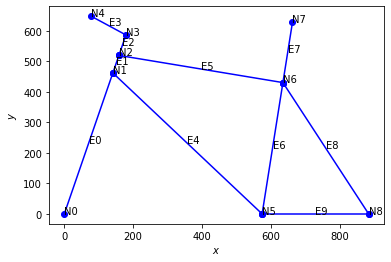

In [33]:
fmn.plot_system()

In [34]:
fmn.post_get_force(0,1) # Force at front wheel (N)

592.6010276675224

In [35]:
fmn.post_get_force(8,1) # Force at rear wheel  (N)

583.3989768028259

# Handle bar

In [12]:
# Length of the beam in meters
L_beam = 0.6
# The Young's modulus in Pa
E = 70E9
# The height of the beam in metres
h = 27/1E3
# The width of the beam in metres
b = 27/1E3
# The area moment of inertia:
I = 1/12 * b * h**3
# The cross-sectional area
A = h * b
# The density (only important for dynamic analyses)
rho = 2710
# The force applied to the structure. 
F = (120*9.8)/2

In [13]:
nodecoor = np.array([
                     [0,0],        # Node 0
                     [0.3,0],      # Node 1
                     [0.6,0]])     # Node 2

elemconn = np.array([
                     [0,1], # Element 0 connects Node 0 and Node 1
                     [1,2]  # Element 1 connects Node 1 and Node 2
                     ])





prescribed_displacement = np.array([
                                    [1,0,0], # Node 1, in the 0 direction (x-direcion) with a displacement of 0
                                    [1,1,0], # Node 1, in the 1 direction (y-direcion) with a displacement of 0
                                    [1,2,0],  # Node 1, in the 2 direction (moment) with a angle of 0
                                    ])



prescribed_forces = np.array([
                              [0,1,-F], # Prescribed force applied to Node 0, in the 1 direction (y-direcion) with a magnitude of F.
                              [2,1,-F], # Prescribed force applied to Node 2, in the 1 direction (y-direcion) with a magnitude of F.
                                ])

# Element properties
elemprop = {}
# Young's modulus [Pa]
elemprop["E"] = np.ones(elemconn.shape[0]) * E
# Area moment of inertia [m^4]
elemprop["I"] = np.ones(elemconn.shape[0]) * I
# Cross-sectional area [m^2]
elemprop["A"] = np.ones(elemconn.shape[0]) * A
# Density [kg/m^3]
elemprop["density"] = np.ones(elemconn.shape[0]) * rho

fmn = sfem.FEM_Beam_2D(nodecoor,                # Nodal coordinates
                       elemconn,                # Element connectivity
                       prescribed_displacement, # Prescribed displacements
                       prescribed_forces,       # Prescribed forces
                       elemprop)                # Element properties

In [14]:
solution_dict = fmn.solve()
solution_dict["loads"]

array([   0., -588.,    0.,    0., 1176.,    0.,    0., -588.,    0.])

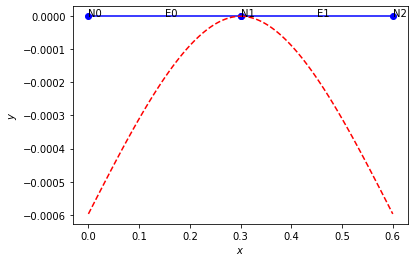

In [15]:
fmn.plot_system(show_displacement=True)